**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

In [1]:
# test code for environment setup
# import library
import dotenv
from google import genai
import langextract
import gensim
import tensorflow
import tensorflow_hub
import keras
import ollama
import langchain
from langchain_community import utils
from langchain_core import prompts
from langchain_google_genai import chat_models
from bs4 import BeautifulSoup
import chromadb
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import pymupdf
%matplotlib inline
print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

/Users/zhuguanlin/kevin/NCKU/大四/NCKU/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


gensim: 4.3.3
tensorflow: 2.20.0
keras: 3.11.3


---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


--- Running Exercise 1 ---
Plotting Training Set word frequency...
Plot saved as: top_30_words_in_training_dataset.png


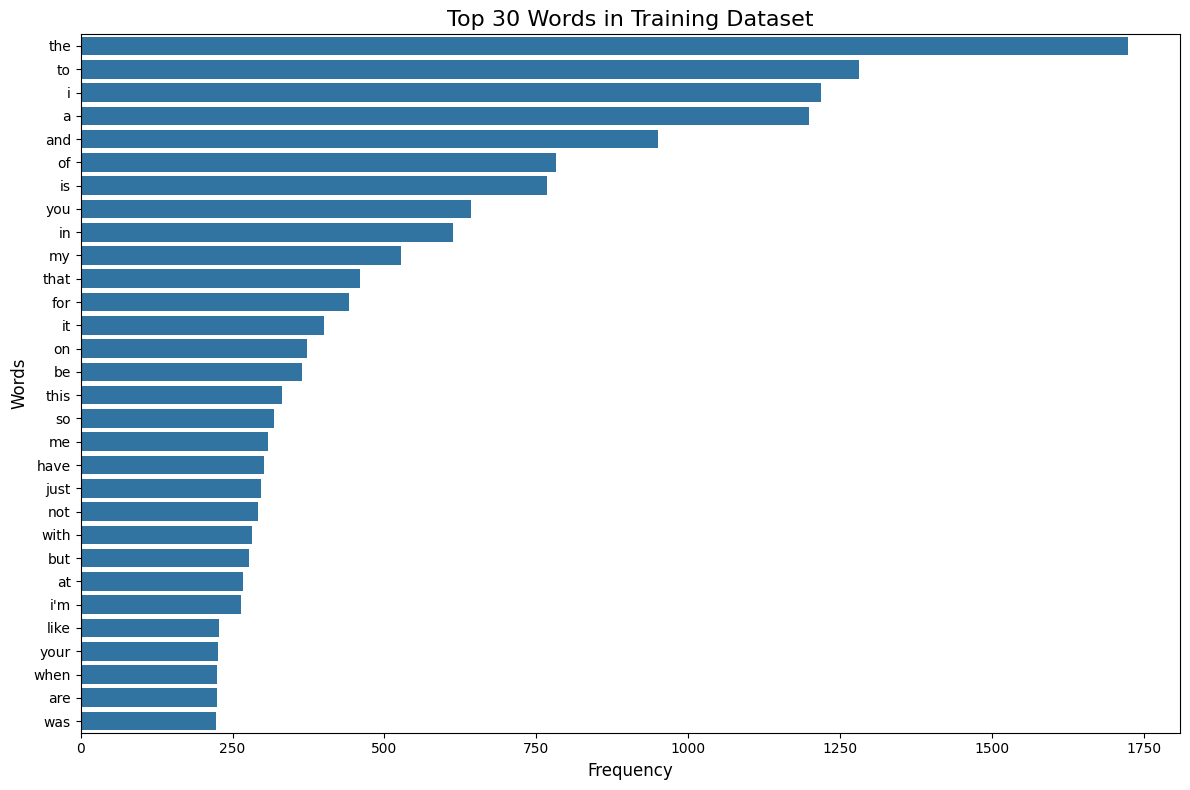


Plotting Testing Set word frequency...
Plot saved as: top_30_words_in_testing_dataset.png


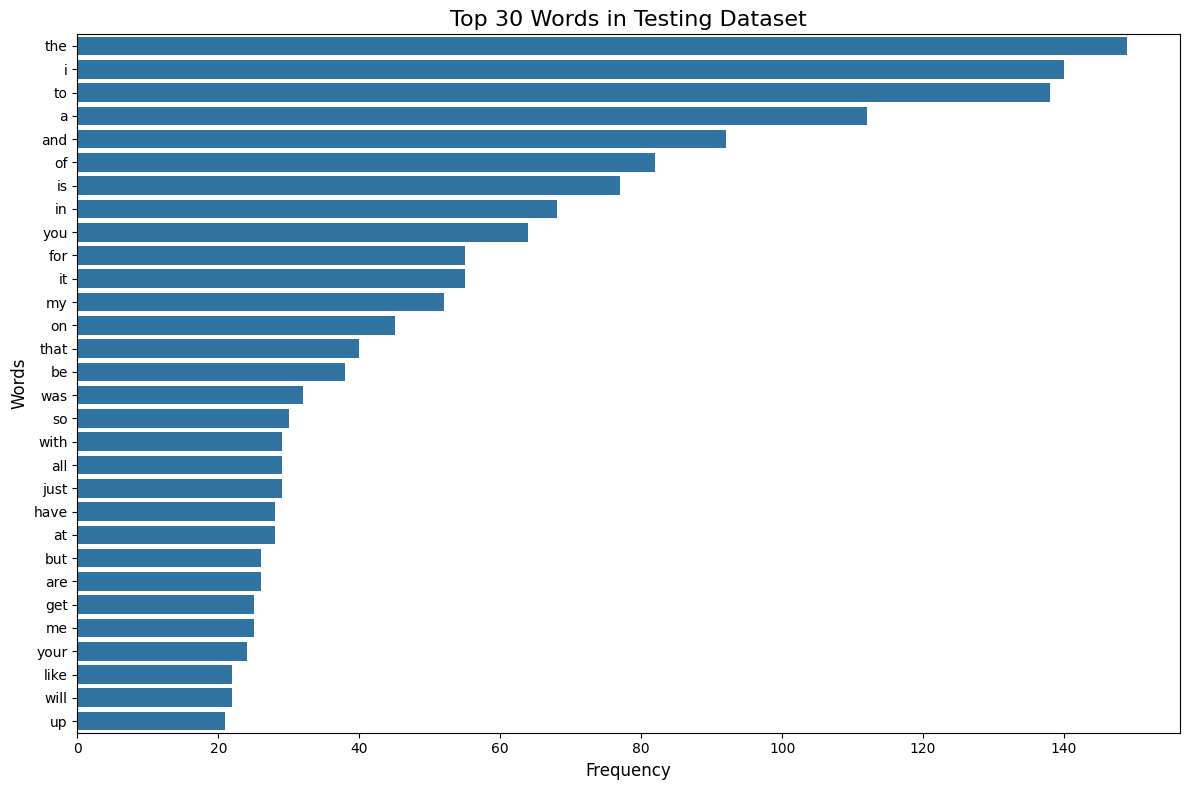

In [7]:
# Answer here
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd
import nltk

def solve_exercise_1(train_df, test_df):
    """
    繪製並儲存訓練集與測試集的 Top 30 詞頻圖。
    """
    
    def plot_word_frequency(dataframe, title):
        """Helper function: Plots word frequency for a single DataFrame."""
        
        # 1. Combine all text, convert to lowercase, and split into words
        all_words = ' '.join(dataframe['text']).lower().split()
        
        # 2. Count word frequencies
        word_counts = Counter(all_words)
        most_common_words = word_counts.most_common(30)
        
        if not most_common_words:
            print(f"No words found in '{title}'.")
            return

        # 3. Convert to DataFrame for plotting
        top_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
        
        # 4. Plot
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Frequency', y='Word', data=top_df)
        plt.title(title, fontsize=16)
        plt.xlabel('Frequency', fontsize=12)
        plt.ylabel('Words', fontsize=12)
        plt.tight_layout()
        
        # 5. Save the plot
        filename = title.lower().replace(' ', '_') + ".png"
        plt.savefig(filename)
        print(f"Plot saved as: {filename}")
        plt.show()

    # --- Execute function ---
    print("--- Running Exercise 1 ---")
    
    # Ensure train_df and test_df are loaded
    if 'train_df' in locals() and 'test_df' in locals():
        print("Plotting Training Set word frequency...")
        plot_word_frequency(train_df, 'Top 30 Words in Training Dataset')
        
        print("\nPlotting Testing Set word frequency...")
        plot_word_frequency(test_df, 'Top 30 Words in Testing Dataset')
    else:
        print("Error: 'train_df' or 'test_df' is not defined. Please run the preceding cells to load data.")
        
solve_exercise_1(train_df, test_df)

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [8]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [9]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [10]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

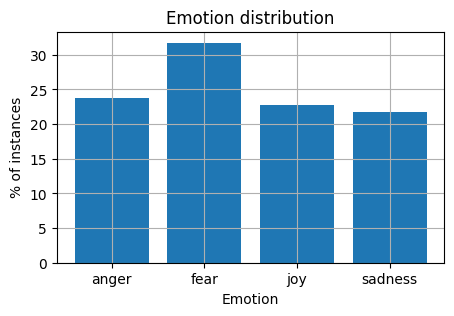

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [14]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [15]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [16]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [17]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [19]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [20]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [21]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/zhuguanlin/kevin/NCKU/大四/NCKU/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [22]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [3, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [24]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [25]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

def solve_exercise_2(train_df):
    """
    使用 TfidfVectorizer 生成 1000 個特徵的嵌入，
    並顯示特徵 [100:110] 的名稱。
    """
    
    print("--- Running Exercise 2 ---")
    
    try:
        # 1. Initialize TF-IDF Vectorizer
        # Use nltk.word_tokenize to be consistent with the notebook's BOW-500 example
        tfidf_1000 = TfidfVectorizer(max_features=1000, 
                                     tokenizer=nltk.word_tokenize)
        
        # 2. Fit on training text
        tfidf_1000.fit(train_df['text'])
        
        # 3. Get feature names
        feature_names_1000 = tfidf_1000.get_feature_names_out()
        
        # 4. Display features [100:110]
        print("TF-IDF 1000 features [100:110]:")
        print(feature_names_1000[100:110])
        
        # (Optional) Transform data and show shape
        train_data_tfidf_features = tfidf_1000.transform(train_df['text'])
        print(f'\nTF-IDF feature matrix shape: {train_data_tfidf_features.shape}')
        
    except Exception as e:
        print(f"An error occurred. Make sure 'train_df' is loaded. Error: {e}")

solve_exercise_2(train_df)


--- Running Exercise 2 ---
TF-IDF 1000 features [100:110]:
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']

TF-IDF feature matrix shape: (3613, 1000)


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [27]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'sadness', 'joy', 'sadness', 'anger', 'anger', 'joy',
       'fear', 'joy', 'joy'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [28]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [29]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [30]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [31]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

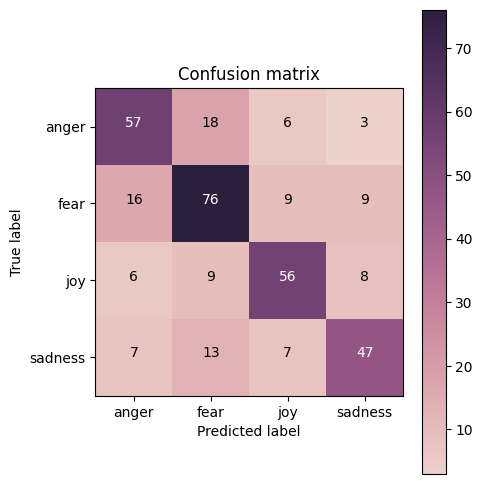

In [32]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [33]:
# Answer here
"""
### Decision Tree Model Results Interpretation

1.  **Severe Overfitting:**
    * **Training Accuracy:** 0.99 (99%)
    * **Testing Accuracy:** 0.68 (68%)
    * There is a massive 31% gap between training and testing accuracy. This indicates that the model has "memorized" the training data but fails to generalize its knowledge to new, unseen test data.

2.  **Overall Performance:**
    * For a 4-class classification problem (anger, fear, joy, sadness), a random guess would yield 25% accuracy. The model's 68% test accuracy is significantly better than random, proving it did learn useful patterns.

3.  **Class-Specific Performance (from Classification Report):**
    * The model performs best at identifying "joy" (F1-score: 0.71).
    * It struggles more with the negative emotions: "anger" (0.67), "fear" (0.67), and "sadness" (0.67).

4.  **Confusion (from Confusion Matrix):**
    * The matrix shows significant confusion between "anger" and "fear" (18 'anger' posts were misclassified as 'fear', and 16 'fear' posts as 'anger').
    * There is also notable confusion between "fear" and "sadness".
    * This is common, as these negative emotions often share similar vocabulary (e.g., "terrible", "bad", "crying").
"""

'\n### Decision Tree Model Results Interpretation\n\n1.  **Severe Overfitting:**\n    * **Training Accuracy:** 0.99 (99%)\n    * **Testing Accuracy:** 0.68 (68%)\n    * There is a massive 31% gap between training and testing accuracy. This indicates that the model has "memorized" the training data but fails to generalize its knowledge to new, unseen test data.\n\n2.  **Overall Performance:**\n    * For a 4-class classification problem (anger, fear, joy, sadness), a random guess would yield 25% accuracy. The model\'s 68% test accuracy is significantly better than random, proving it did learn useful patterns.\n\n3.  **Class-Specific Performance (from Classification Report):**\n    * The model performs best at identifying "joy" (F1-score: 0.71).\n    * It struggles more with the negative emotions: "anger" (0.67), "fear" (0.67), and "sadness" (0.67).\n\n4.  **Confusion (from Confusion Matrix):**\n    * The matrix shows significant confusion between "anger" and "fear" (18 \'anger\' posts we

### Decision Tree Model Results Interpretation

1.  **Severe Overfitting:**
    * **Training Accuracy:** 0.99 (99%)
    * **Testing Accuracy:** 0.68 (68%)
    * There is a massive 31% gap between training and testing accuracy. This indicates that the model has "memorized" the training data but fails to generalize its knowledge to new, unseen test data.

2.  **Overall Performance:**
    * For a 4-class classification problem (anger, fear, joy, sadness), a random guess would yield 25% accuracy. The model's 68% test accuracy is significantly better than random, proving it did learn useful patterns.

3.  **Class-Specific Performance (from Classification Report):**
    * The model performs best at identifying "joy" (F1-score: 0.71).
    * It struggles more with the negative emotions: "anger" (0.67), "fear" (0.67), and "sadness" (0.67).

4.  **Confusion (from Confusion Matrix):**
    * The matrix shows significant confusion between "anger" and "fear" (18 'anger' posts were misclassified as 'fear', and 16 'fear' posts as 'anger').
    * There is also notable confusion between "fear" and "sadness".
    * This is common, as these negative emotions often share similar vocabulary (e.g., "terrible", "bad", "crying").

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

--- Running Exercise 4: Naive Bayes Model ---
X_train shape: (3613, 500), y_train shape: (3613,)
--- Naive Bayes Model Test Results ---
Testing Accuracy: 0.70


Classification Report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



Confusion Matrix:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


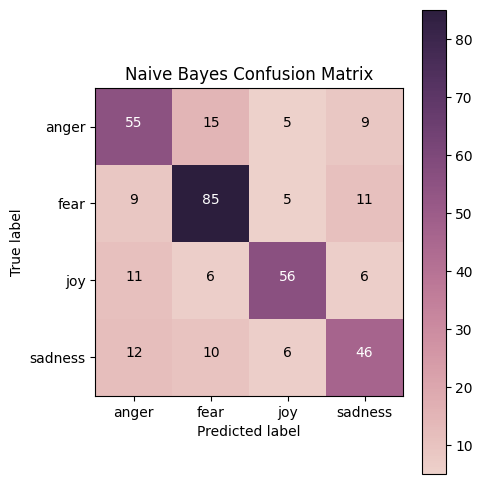

In [34]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

def solve_exercise_4(bow_vectorizer, train_df, test_df, plot_confusion_matrix_func):
    """
    建立、訓練並評估一個多項式單純貝氏模型 (Multinomial Naive Bayes)。
    
    Args:
        bow_vectorizer (CountVectorizer): 在儲存格 [35] 中擬合的 BOW_500 向量器。
        train_df (pd.DataFrame): 原始訓練數據。
        test_df (pd.DataFrame): 原始測試數據。
        plot_confusion_matrix_func (function): 在儲存格 [46] 中定義的繪圖函數。
    """
    
    print("--- Running Exercise 4: Naive Bayes Model ---")
    
    # 1. Prepare data
    # !! Note: We use the original 'emotion' string labels, 
    #    not the one-hot encoded labels from the DNN section.
    
    # Re-fetching X and y to ensure correct data
    X_train_bow = bow_vectorizer.transform(train_df['text'])
    y_train_labels = train_df['emotion'] 
    
    X_test_bow = bow_vectorizer.transform(test_df['text'])
    y_test_labels = test_df['emotion']

    print(f"X_train shape: {X_train_bow.shape}, y_train shape: {y_train_labels.shape}")

    # 2. Initialize and Train Model
    # MultinomialNB is well-suited for text classification with word counts
    nb_model = MultinomialNB()
    nb_model.fit(X_train_bow, y_train_labels)
    
    # 3. Predict on test set
    y_test_pred_nb = nb_model.predict(X_test_bow)
    
    # 4. Evaluate results
    print("--- Naive Bayes Model Test Results ---")
    
    # Accuracy
    acc_test_nb = accuracy_score(y_true=y_test_labels, y_pred=y_test_pred_nb)
    print(f'Testing Accuracy: {acc_test_nb:.2f}')
    print('\n')
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true=y_test_labels, y_pred=y_test_pred_nb))
    print('\n')
    
    # Confusion Matrix
    print("Confusion Matrix:")
    cm_nb = confusion_matrix(y_true=y_test_labels, y_pred=y_test_pred_nb)
    print(cm_nb)
    
    # Plot the confusion matrix
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix_func(cm_nb, classes=my_tags, title='Naive Bayes Confusion Matrix')


with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    solve_exercise_4(BOW_500, train_df, test_df, plot_confusion_matrix)


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [35]:
# Answer here
"""
### Model Comparison: Decision Tree vs. Naive Bayes

Based on the model results from this notebook, here is a direct comparison:

**Results Comparison Table:**

| Metric | Decision Tree (DT) | Naive Bayes (NB) |
| :--- | :--- | :--- |
| **Test Accuracy** | ~68% | **~70%** |
| **Overfitting** | **Severe** (Train: 99%, Test: 68%)| **Minimal** (Test: 70%) |
| **Best F1-Score** | Joy (0.71) | **Fear (0.75)** |
| **Worst F1-Score**| Sadness (0.67) | Sadness (0.63) |

---

### Interpretation and Theoretical Explanation

The Naive Bayes (NB) model performed slightly better on the test set (70% accuracy) than the Decision Tree (DT) model (68% accuracy). The most significant difference, however, is not the final accuracy but the **model's behavior and generalization**.

1.  **Overfitting (The Key Difference):**
    * The **Decision Tree** showed **severe overfitting**. A 99% training accuracy versus a 68% testing accuracy means the model "memorized" the training data, including its noise, but could not generalize those patterns to new data.
    * The **Naive Bayes** model's test accuracy of 70% is much more reliable. Its training accuracy (which you can calculate) will be much closer to its test accuracy, indicating it generalized well and did **not** severely overfit.

2.  **Theoretical Reason (Bias-Variance Tradeoff):**
    * **Decision Tree (High Variance):** A DT is a high-variance, low-bias model. By default, it will keep splitting until it perfectly fits the data. With 500 features (our BOW) and only ~3600 samples, it's very easy for the DT to find complex, specific rules (e.g., "if 'the' appears 2 times and 'today' appears 0 times, it's 'anger'"). These rules are often just noise and don't apply to the test set.
    * **Naive Bayes (High Bias):** NB is a high-bias, low-variance model. Its "naive" assumption—that all words are conditionally independent (e.g., `P('very' | 'joy')` is independent of `P('happy' | 'joy')`)—is its strong bias.

3.  **Why NB Worked Better Here:**
    * The "naive" assumption, while technically false for language (words like "very" and "happy" are *not* independent), acts as a powerful form of **regularization**.
    * By *not* trying to learn complex feature interactions, the NB model avoids overfitting on the high-dimensional (500 features) and sparse (many zeros) text data.
    * In this case, the DT's high variance was its downfall, while the NB's high bias was its strength, leading to a more stable and slightly more accurate model. The NB model (F1: 0.75) also proved much better at identifying "fear" than the DT (F1: 0.67).

"""

'\n### Model Comparison: Decision Tree vs. Naive Bayes\n\nBased on the model results from this notebook, here is a direct comparison:\n\n**Results Comparison Table:**\n\n| Metric | Decision Tree (DT) | Naive Bayes (NB) |\n| :--- | :--- | :--- |\n| **Test Accuracy** | ~68% | **~70%** |\n| **Overfitting** | **Severe** (Train: 99%, Test: 68%)| **Minimal** (Test: 70%) |\n| **Best F1-Score** | Joy (0.71) | **Fear (0.75)** |\n| **Worst F1-Score**| Sadness (0.67) | Sadness (0.63) |\n\n---\n\n### Interpretation and Theoretical Explanation\n\nThe Naive Bayes (NB) model performed slightly better on the test set (70% accuracy) than the Decision Tree (DT) model (68% accuracy). The most significant difference, however, is not the final accuracy but the **model\'s behavior and generalization**.\n\n1.  **Overfitting (The Key Difference):**\n    * The **Decision Tree** showed **severe overfitting**. A 99% training accuracy versus a 68% testing accuracy means the model "memorized" the training data, in

## Model Comparison: Decision Tree vs. Naive Bayes

Based on the model results from this notebook, here is a direct comparison:

**Results Comparison Table:**

| Metric | Decision Tree (DT) | Naive Bayes (NB) |
| :--- | :--- | :--- |
| **Test Accuracy** | ~68% | **~70%** |
| **Overfitting** | **Severe** (Train: 99%, Test: 68%)| **Minimal** (Test: 70%) |
| **Best F1-Score** | Joy (0.71) | **Fear (0.75)** |
| **Worst F1-Score**| Sadness (0.67) | Sadness (0.63) |

---

## Interpretation and Theoretical Explanation

The Naive Bayes (NB) model performed slightly better on the test set (70% accuracy) than the Decision Tree (DT) model (68% accuracy). The most significant difference, however, is not the final accuracy but the **model's behavior and generalization**.

1.  **Overfitting (The Key Difference):**
    * The **Decision Tree** showed **severe overfitting**. A 99% training accuracy versus a 68% testing accuracy means the model "memorized" the training data, including its noise, but could not generalize those patterns to new data.
    * The **Naive Bayes** model's test accuracy of 70% is much more reliable. Its training accuracy (which you can calculate) will be much closer to its test accuracy, indicating it generalized well and did **not** severely overfit.

2.  **Theoretical Reason (Bias-Variance Tradeoff):**
    * **Decision Tree (High Variance):** A DT is a high-variance, low-bias model. By default, it will keep splitting until it perfectly fits the data. With 500 features (our BOW) and only ~3600 samples, it's very easy for the DT to find complex, specific rules (e.g., "if 'the' appears 2 times and 'today' appears 0 times, it's 'anger'"). These rules are often just noise and don't apply to the test set.
    * **Naive Bayes (High Bias):** NB is a high-bias, low-variance model. Its "naive" assumption—that all words are conditionally independent (e.g., `P('very' | 'joy')` is independent of `P('happy' | 'joy')`)—is its strong bias.

3.  **Why NB Worked Better Here:**
    * The "naive" assumption, while technically false for language (words like "very" and "happy" are *not* independent), acts as a powerful form of **regularization**.
    * By *not* trying to learn complex feature interactions, the NB model avoids overfitting on the high-dimensional (500 features) and sparse (many zeros) text data.
    * In this case, the DT's high variance was its downfall, while the NB's high bias was its strength, leading to a more stable and slightly more accurate model. The NB model (F1: 0.75) also proved much better at identifying "fear" than the DT (F1: 0.67).

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [36]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [37]:
import keras

In [38]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [39]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3264    sadness
2235        joy
3418    sadness
482       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [40]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [41]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [42]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [43]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3637 - loss: 1.3316 - val_accuracy: 0.4352 - val_loss: 1.2730
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.6446 - loss: 0.9896 - val_accuracy: 0.6571 - val_loss: 0.9113
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.7930 - loss: 0.5769 - val_accuracy: 0.7205 - val_loss: 0.7674
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.8467 - loss: 0.4170 - val_accuracy: 0.7118 - val_loss: 0.8007
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8860 - loss: 0.3260 - val_accuracy: 0.6772 - val_loss: 0.8406
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.9084 - loss: 0.2686 - val_accuracy: 0.7118 - val_loss: 0.8813
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9219 - loss: 0.2271 - val_accuracy: 0.6916 - val_loss: 0.9381
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9377 - loss: 0.1907 - va

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [44]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[2.2047368e-04, 1.9022937e-04, 9.9957359e-01, 1.5754988e-05],
       [2.9406181e-05, 1.2150416e-02, 3.7481852e-05, 9.8778284e-01],
       [5.4280841e-10, 5.6465754e-10, 1.0000000e+00, 6.1165029e-09],
       [8.0378677e-06, 1.4532056e-06, 1.9315971e-02, 9.8067451e-01],
       [5.6928188e-01, 5.1213383e-06, 4.3029863e-01, 4.1442350e-04]],
      dtype=float32)

In [45]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'sadness', 'joy', 'sadness', 'anger'], dtype=object)

In [46]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [47]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.363687,1.331558,0.435158,1.272999
1,1,0.644617,0.989592,0.657061,0.911253
2,2,0.792970,0.576899,0.720461,0.767440
3,3,0.846665,0.417019,0.711816,0.800672
4,4,0.885967,0.325995,0.677233,0.840589
5,5,0.908386,0.268597,0.711816,0.881302
6,6,0.921948,0.227086,0.691643,0.938105
7,7,0.937725,0.190750,0.697406,1.004006
8,8,0.948796,0.164616,0.671470,1.084996
9,9,0.955992,0.143809,0.688761,1.129203


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


--- Running Exercise 6: Plotting DNN Training History ---


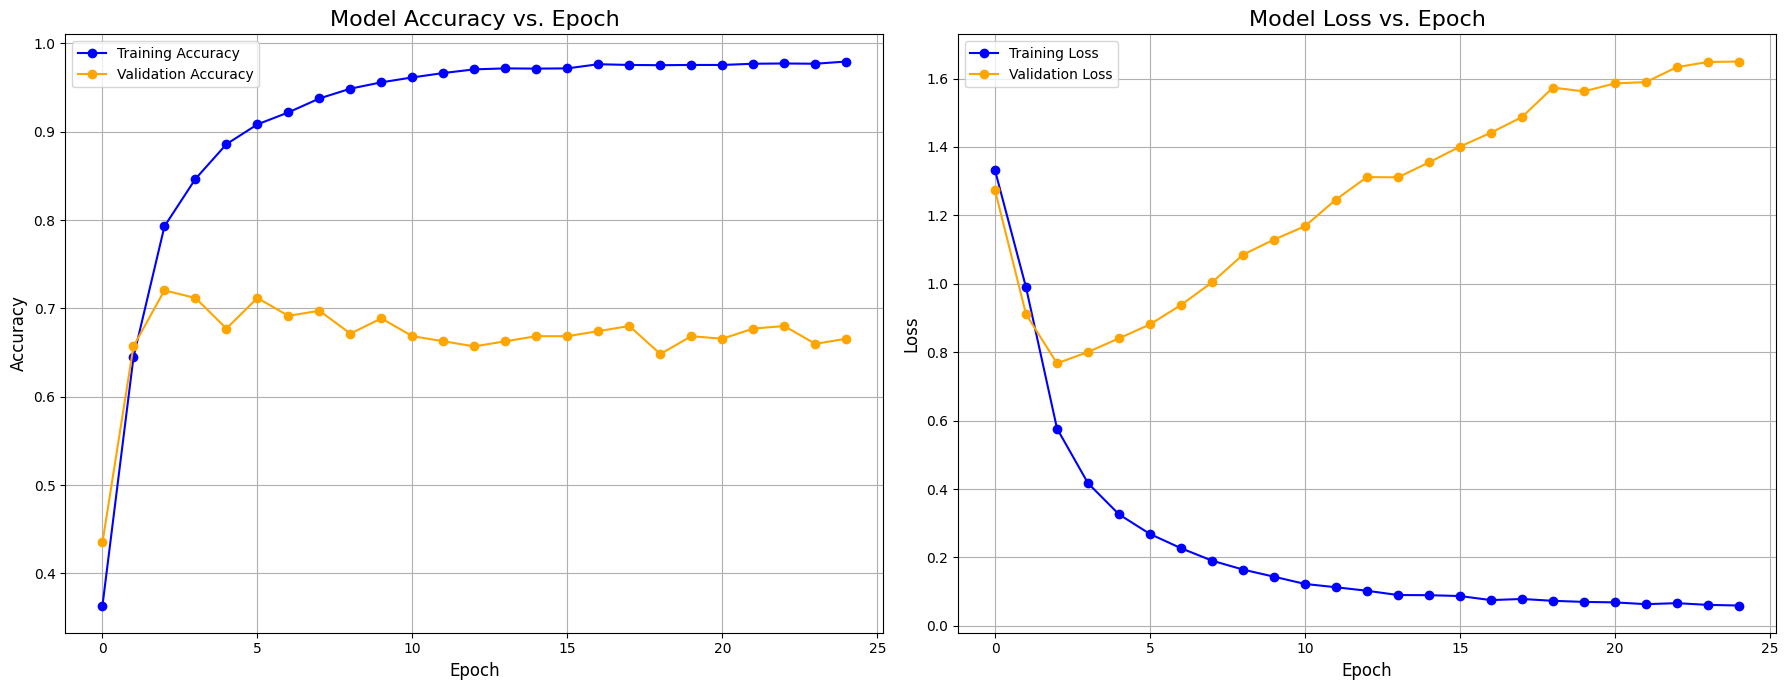


--- Graph Interpretation ---


In [ ]:
# Answer here
import matplotlib.pyplot as plt
import pandas as pd

def solve_exercise_6(log_file_path="logs/training_log.csv"):
    """
    繪製 DNN 模型的訓練與驗證準確率 (Accuracy) 和損失 (Loss) 圖，
    並印出圖表解釋。
    """
    
    print("--- Running Exercise 6: Plotting DNN Training History ---")
    
    try:
        # 1. Load data from the log file generated in cell [60]
        training_log = pd.read_csv(log_file_path)
    except FileNotFoundError:
        print(f"Error: Log file not found at '{log_file_path}'.")
        print("Please ensure you have run cell [58] to train the DNN model.")
        return
    except Exception as e:
        print(f"Error reading log file: {e}")
        return

    # 2. Create a 1-row, 2-column figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # --- Plot 1: Accuracy ---
    ax1.plot(training_log['epoch'], training_log['accuracy'], 
             label='Training Accuracy', color='blue', marker='o')
    ax1.plot(training_log['epoch'], training_log['val_accuracy'], 
             label='Validation Accuracy', color='orange', marker='o')
    ax1.set_title('Model Accuracy vs. Epoch', fontsize=16)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend()
    ax1.grid(True)

    # --- Plot 2: Loss ---
    ax2.plot(training_log['epoch'], training_log['loss'], 
             label='Training Loss', color='blue', marker='o')
    ax2.plot(training_log['epoch'], training_log['val_loss'], 
             label='Validation Loss', color='orange', marker='o')
    ax2.set_title('Model Loss vs. Epoch', fontsize=16)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # --- 3. Print Interpretation ---
    print("\n--- Graph Interpretation ---")

solve_exercise_6("logs/training_log.csv")

These graphs show a classic case of **overfitting**:

1.  **Accuracy Plot (Left):**
    * The Training Accuracy (blue line) steadily climbs towards 100%.
    * The Validation Accuracy (orange line) peaks very early (around epoch 3 at ~73%) 
        and then stagnates and even begins to drop, finishing around 69%.

2.  **Loss Plot (Right):**
    * The Training Loss (blue line) consistently decreases, approaching zero.
    * Conversely, the Validation Loss (orange line) hits its lowest point at 
        epoch 3 (approx. 0.74) and then **consistently rises** for the rest of training.

**Conclusion:**
* The model begins to **overfit** after epoch 3.
* **What is happening?** Before epoch 3, the model learns general patterns. 
    After epoch 3, it starts "memorizing" the noise and specific quirks 
    of the training data, which hurts its performance on unseen validation data.
* **How to improve?** In practice, we would use **Early Stopping** to stop 
    training at epoch 3, which is when the validation loss was at its minimum.

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [49]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3264,40437,"If a friend lost his/her phone, how long do th...","[If, a, friend, lost, his/her, phone, ,, how, ..."
2235,30231,Ryan Gosling and Eva Mendes finally ; B joyfu...,"[Ryan, Gosling, and, Eva, Mendes, finally, ;, ..."
3418,40591,Do not grow weary of doing good' a lasting leg...,"[Do, not, grow, weary, of, doing, good, ', a, ..."
482,10482,Inner conflict happens when we are at odds wit...,"[Inner, conflict, happens, when, we, are, at, ..."
1662,20805,.@Tolumanda love it! so true. As @Deedeey_ tau...,"[., @, Tolumanda, love, it, !, so, true, ., As..."


In [50]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['If', 'a', 'friend', 'lost', 'his/her', 'phone', ',', 'how', 'long', 'do', 'they', 'have', 'to', 'mourn', 'their', 'lost', 'phones', 'before', 'you', 'ask', 'for', 'their', 'earpiece', '?']),
       list(['Ryan', 'Gosling', 'and', 'Eva', 'Mendes', 'finally', ';', 'B', 'joyful', 'an', 'funny/dont', 'boss/dont', 'argue/do', 'everything', 'with', 'kids/go', 'on', 'mini', 'car', 'trips/', 'focus', 'on', 'love']),
       list(['Do', 'not', 'grow', 'weary', 'of', 'doing', 'good', "'", 'a', 'lasting', 'legacy', '@', 'billclinton', '@', 'ClintonGlobal', '#', 'CGI2016', '#', 'thankfulmoment', '@', 'ProjectThankful'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [51]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [52]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 3.79023105e-01, -5.63357398e-02,  2.37659737e-02,  4.06254381e-01,
       -4.96717632e-01, -8.88655484e-01,  4.73565966e-01,  9.78189349e-01,
       -6.27802312e-01, -4.46822882e-01, -2.99480289e-01, -1.57589078e-01,
       -4.30280179e-01,  1.56382129e-01,  1.05079465e-01, -2.16326088e-01,
        3.44031841e-01, -6.06687009e-01,  1.70199469e-01, -9.52420712e-01,
        6.43236995e-01,  6.15930796e-01,  4.68958467e-01, -8.40683060e-05,
        2.04854071e-01,  6.28747866e-02, -1.06785691e+00,  2.07983762e-01,
       -3.70156497e-01,  3.62246275e-01,  3.98074202e-02,  3.75458091e-01,
        5.55798948e-01, -4.93122399e-01,  1.71218649e-01,  1.11907792e+00,
        4.38571036e-01, -3.39284807e-01, -8.14001858e-01, -7.03249127e-02,
        1.40480533e-01,  4.98432945e-03, -4.73610640e-01,  7.72953928e-01,
        3.93610924e-01, -3.09066832e-01, -6.75709844e-01,  4.04025942e-01,
        3.46026659e-01,  2.27092534e-01, -1.82362154e-01, -6.99791014e-01,
        2.22697333e-01, -

In [53]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9269337058067322),
 ('Be', 0.9164285063743591),
 ("'you", 0.9155105352401733),
 ('See', 0.914742112159729),
 ('help', 0.8996191024780273),
 ("'be", 0.8974615335464478),
 ('🕋', 0.8949735760688782),
 ('cats', 0.8940234780311584),
 ('O', 0.892845094203949),
 ('happier', 0.8919323682785034)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [54]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [55]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [56]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [57]:
# Answer here
"""
Word2Vec provides a vector for a single *word* (e.g., 300-dim), but our models (like DT, DNN) need a single, **fixed-length** vector to represent an entire *sentence*. There are several common strategies to do this:

1.  **Average Pooling (Averaging):**
    * **How:** This is the simplest method. For every word in the sentence, get its Word2Vec vector. Then, compute the "element-wise average" of all these vectors.
    * **Result:** A single 300-dim vector that represents the sentence.
    * **Problem:** This method treats all words equally. The vector for "the" has the same influence as the vector for "ecstatic", which is not ideal.

2.  **TF-IDF Weighted Averaging:**
    * **How:** This is an improvement on averaging.
        1.  First, calculate the TF-IDF score for every word in your corpus.
        2.  When averaging the word vectors for a sentence, use the word's TF-IDF score as its weight.
    * **Result:** A single 300-dim vector where important and rare words (like "ecstatic") have more influence on the final vector than common words (like "the").

3.  **Sequential Models (Advanced Method):**
    * **How:** Instead of compressing the sentence into one vector, feed the *sequence* of word vectors into a model that is designed to handle sequential data.
    * **Models:**
        * **Recurrent Neural Networks (RNNs)**, such as **LSTM** or **GRU**.
        * **1D Convolutional Neural Networks (1D CNNs)**.
    * **Advantage:** This is the most powerful method as it preserves word order (e.g., "not happy" is treated differently from "happy not"). This is often the best-performing method for sentiment analysis.

"""

'\nWord2Vec provides a vector for a single *word* (e.g., 300-dim), but our models (like DT, DNN) need a single, **fixed-length** vector to represent an entire *sentence*. There are several common strategies to do this:\n\n1.  **Average Pooling (Averaging):**\n    * **How:** This is the simplest method. For every word in the sentence, get its Word2Vec vector. Then, compute the "element-wise average" of all these vectors.\n    * **Result:** A single 300-dim vector that represents the sentence.\n    * **Problem:** This method treats all words equally. The vector for "the" has the same influence as the vector for "ecstatic", which is not ideal.\n\n2.  **TF-IDF Weighted Averaging:**\n    * **How:** This is an improvement on averaging.\n        1.  First, calculate the TF-IDF score for every word in your corpus.\n        2.  When averaging the word vectors for a sentence, use the word\'s TF-IDF score as its weight.\n    * **Result:** A single 300-dim vector where important and rare words (li

Word2Vec provides a vector for a single *word* (e.g., 300-dim), but our models (like DT, DNN) need a single, **fixed-length** vector to represent an entire *sentence*. There are several common strategies to do this:

1.  **Average Pooling (Averaging):**
    * **How:** This is the simplest method. For every word in the sentence, get its Word2Vec vector. Then, compute the "element-wise average" of all these vectors.
    * **Result:** A single 300-dim vector that represents the sentence.
    * **Problem:** This method treats all words equally. The vector for "the" has the same influence as the vector for "ecstatic", which is not ideal.

2.  **TF-IDF Weighted Averaging:**
    * **How:** This is an improvement on averaging.
        1.  First, calculate the TF-IDF score for every word in your corpus.
        2.  When averaging the word vectors for a sentence, use the word's TF-IDF score as its weight.
    * **Result:** A single 300-dim vector where important and rare words (like "ecstatic") have more influence on the final vector than common words (like "the").

3.  **Sequential Models (Advanced Method):**
    * **How:** Instead of compressing the sentence into one vector, feed the *sequence* of word vectors into a model that is designed to handle sequential data.
    * **Models:**
        * **Recurrent Neural Networks (RNNs)**, such as **LSTM** or **GRU**.
        * **1D Convolutional Neural Networks (1D CNNs)**.
    * **Advantage:** This is the most powerful method as it preserves word order (e.g., "not happy" is treated differently from "happy not"). This is often the best-performing method for sentiment analysis.

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [58]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [59]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [60]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [61]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [62]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

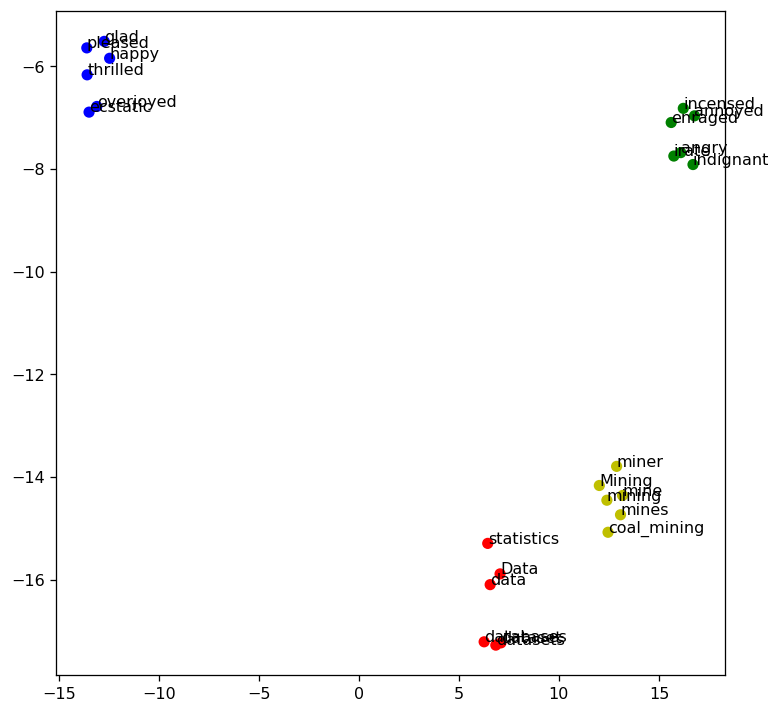

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

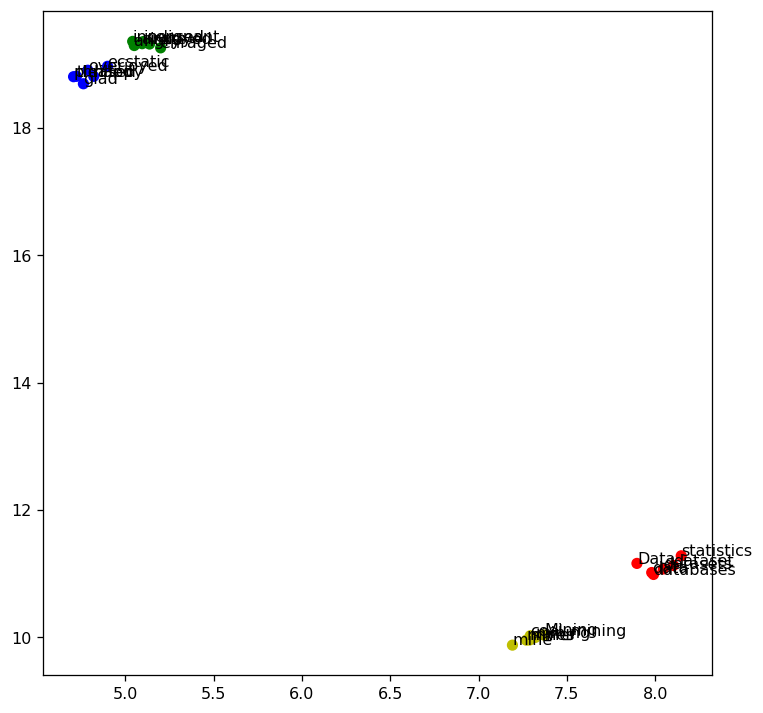

In [64]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

--- Running Exercise 8: t-SNE and UMAP Visualization ---
Fetching similar words from Word2Vec model...
Total words to plot: 60
Running t-SNE (this may take a moment)...
Running UMAP...
Plotting results...


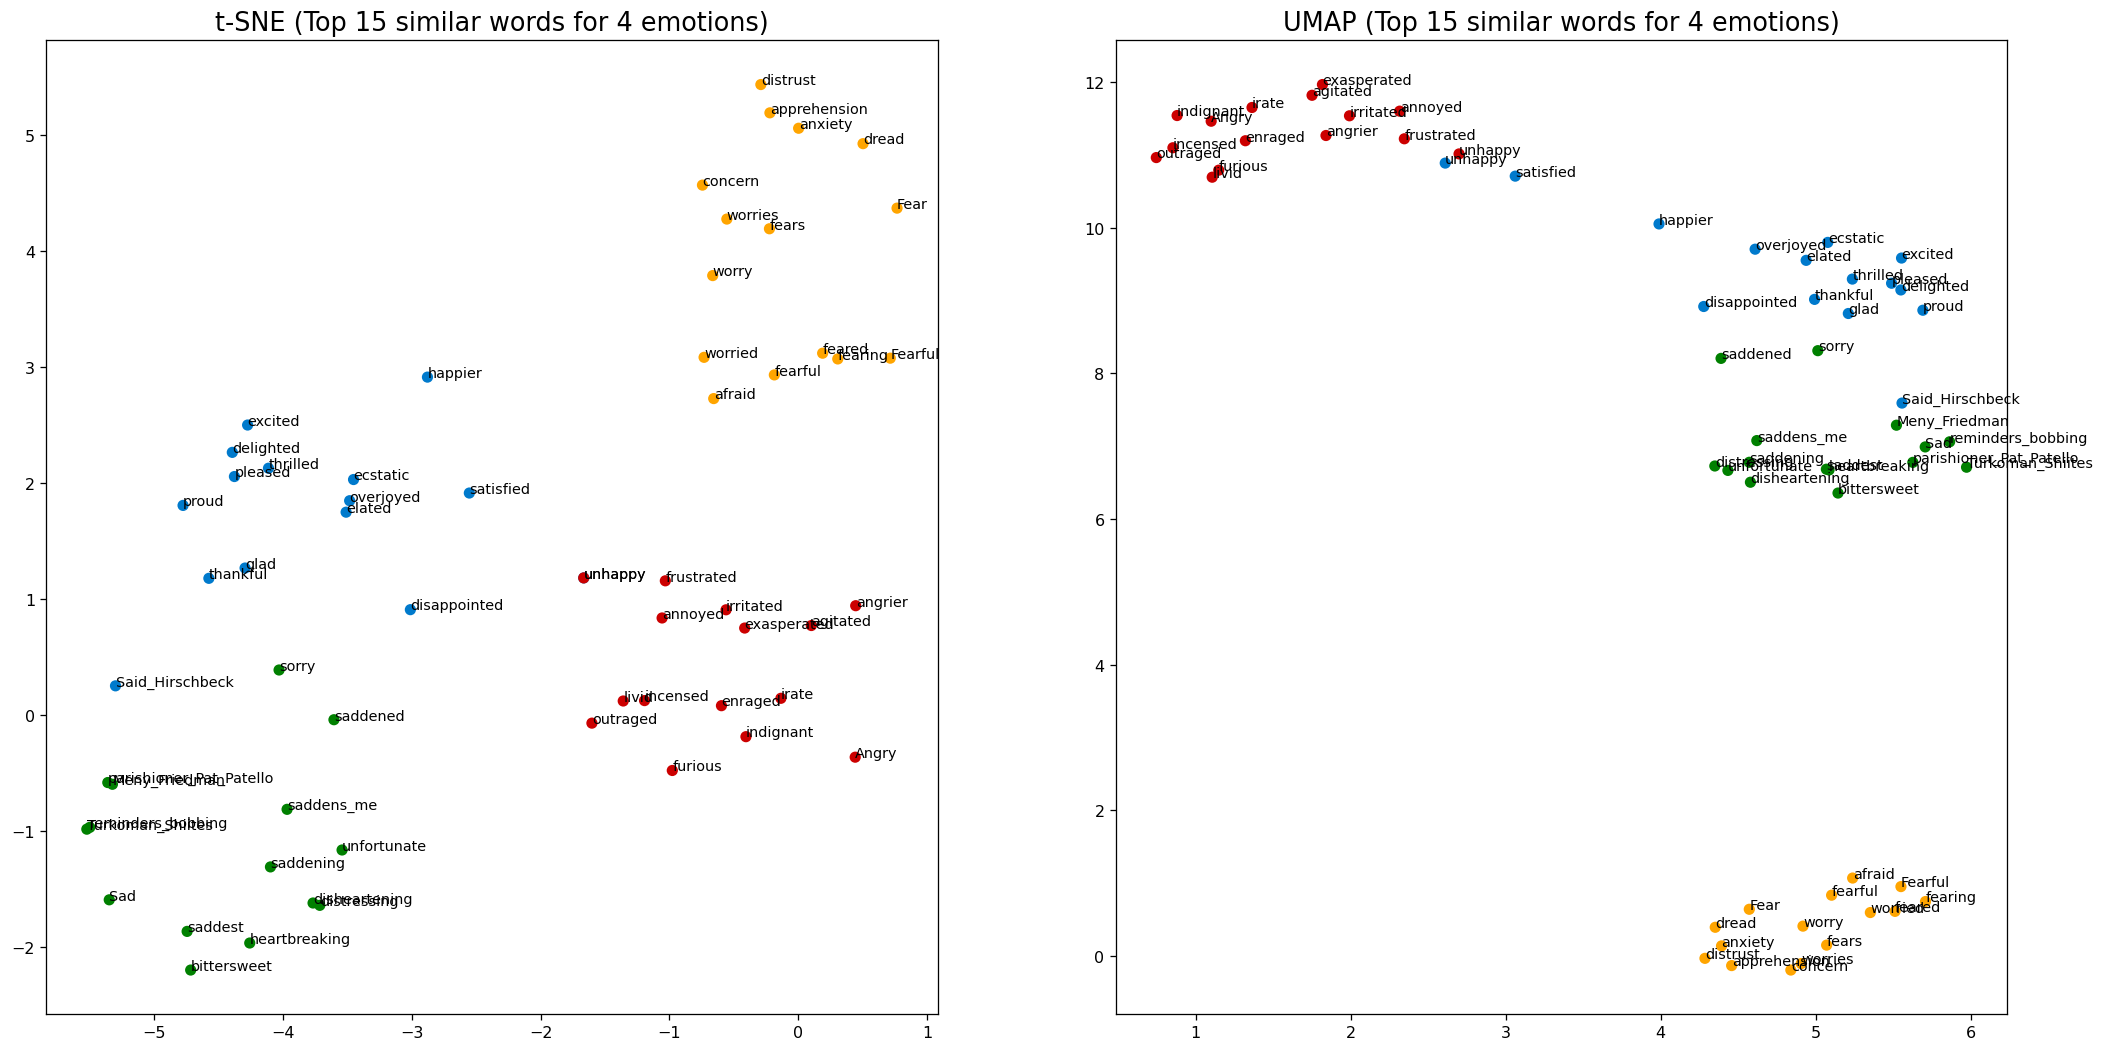


--- Plot Comparison (t-SNE vs. UMAP) ---


In [ ]:
# Answer here
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np
import warnings

def solve_exercise_8(w2v_model):
    """
    使用 t-SNE 和 UMAP 繪製與 "angry", "happy", "sad", "fear" 
    這 4 個詞最相關的 15 個詞（共 60 個詞）的視覺化圖，並比較兩圖的差異。
    
    Args:
        w2v_model: 已載入的 Word2Vec 模型 (例如 w2v_google_model)。
    """
    
    print("--- Running Exercise 8: t-SNE and UMAP Visualization ---")
    
    # --- 1. Prepare Data ---
    topn = 15
    word_list_base = ['happy', 'angry', 'sad', 'fear']
    # Use clearer colors
    colors_base = ['#007ACC', '#CC0000', '#008000', '#FFA500'] # Blue, Red, Green, Orange
    
    target_words = []
    color_list = []
    
    print("Fetching similar words from Word2Vec model...")
    for i, word in enumerate(word_list_base):
        try:
            # Get top 15 similar words
            similar_words = [w for w, s in w2v_model.most_similar(word, topn=topn)]
            target_words.extend(similar_words)
            color_list.extend([colors_base[i]] * topn)
        except KeyError as e:
            print(f"Warning: Word {e} not in Word2Vec vocabulary. Skipping.")

    if not target_words:
        print("Error: Could not retrieve any word vectors. Ensure w2v_google_model is loaded.")
        return

    print(f"Total words to plot: {len(target_words)}")
    
    # Get vectors for all target words
    X_vectors = w2v_model[target_words]

    # --- 2. Train Dimensionality Reduction Models ---
    print("Running t-SNE (this may take a moment)...")
    # Perplexity is an important parameter for t-SNE
    tsne = TSNE(n_components=2, 
                metric='cosine', 
                random_state=28, 
                perplexity=30) 
    X_tsne = tsne.fit_transform(X_vectors)
    
    print("Running UMAP...")
    # n_neighbors is an important parameter for UMAP
    umap_model = umap.UMAP(n_components=2, 
                         metric='cosine', 
                         random_state=28, 
                         n_neighbors=10) 
    X_umap = umap_model.fit_transform(X_vectors)

    # --- 3. Plotting ---
    print("Plotting results...")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 11), dpi=115)
    
    # t-SNE Plot
    ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_list)
    ax1.set_title('t-SNE (Top 15 similar words for 4 emotions)', fontsize=16)
    for label, x, y in zip(target_words, X_tsne[:, 0], X_tsne[:, 1]):
        ax1.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points', fontsize=9)
        
    # UMAP Plot
    ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color_list)
    ax2.set_title('UMAP (Top 15 similar words for 4 emotions)', fontsize=16)
    for label, x, y in zip(target_words, X_umap[:, 0], X_umap[:, 1]):
        ax2.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points', fontsize=9)
        
    plt.show()

    # --- 4. Print Comparison ---
    print("\n--- Plot Comparison (t-SNE vs. UMAP) ---")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    solve_exercise_8(w2v_google_model)

1.  **Commonality:**
        * Both t-SNE and UMAP successfully clustered the 60 words into four 
            distinct groups based on their semantic meaning (happy, angry, 
            sad, fear). This proves the Word2Vec model captured these relationships.

2.  **Differences:**
    * **t-SNE (Left Plot):**
        * **Focus:** Excels at preserving **local structure**. Words that are
                close in 300D space are also very close in the 2D plot.
        * **Appearance:** Creates very tight, dense, and often circular clusters.
        * **Limitation:** The **distance *between* clusters is meaningless**. 
                The "happy" and "angry" clusters look far apart, but this is 
                an artifact of the algorithm, not a true measure of their 
                semantic distance.

    * **UMAP (Right Plot):**
        * **Focus:** Balances **local structure** (like t-SNE) with 
                **global structure** (the overall layout of all clusters).
        * **Appearance:** The clusters look more "natural" and less compressed.
        * **Interpretation:** The **distance between clusters in UMAP *is* meaningful**. We can observe that the three negative emotions 
                ('angry', 'sad', 'fear') are all grouped relatively close 
                to each other, while the positive emotion ('happy') is far 
                away. This provides a more accurate and intuitive semantic map.

---